<a href="https://colab.research.google.com/github/fabioaugustopereira/mestrado-tp547-exercicios/blob/main/Trabalho_Final_parte2_Modula%C3%A7%C3%A3o_e_Demodula%C3%A7%C3%A3o_OFDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


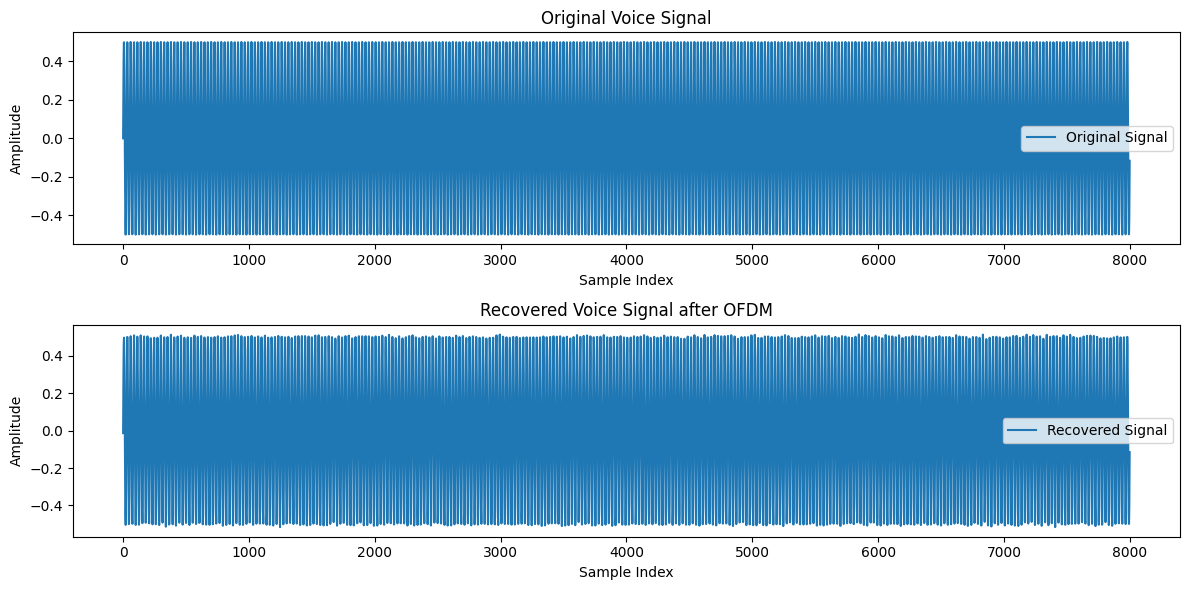

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

#Considerando uma amostra de voz simulada por um sinal de áudio

# Parâmetros OFDM
N = 64  # Número de subportadoras
CP = N // 4  # Comprimento do prefixo cíclico
SNR = 20  # Relação sinal-ruído

# Geração de amostras
fs = 8000  # Taxa de amostragem
t = np.arange(0, 1, 1/fs)
f_voice = 300  # Frequência da voz simulada
voice_signal = 0.5 * np.sin(2 * np.pi * f_voice * t)

# Função para modulação OFDM
def ofdm_modulate(signal, N, CP):
    signal = signal[:len(signal) // N * N]  # Ajuste do comprimento do sinal
    signal = signal.reshape((-1, N))
    signal_freq = fft(signal, axis=1)
    signal_with_cp = np.hstack([signal_freq[:, -CP:], signal_freq])
    return signal_with_cp.flatten()

# Função para demodulação OFDM
def ofdm_demodulate(signal, N, CP):
    signal = signal.reshape((-1, N + CP))
    signal = signal[:, CP:]
    signal_time = ifft(signal, axis=1)
    return signal_time.flatten()

# Modulação
ofdm_signal = ofdm_modulate(voice_signal, N, CP)

# Simulação de canal AWGN
noise = np.random.normal(scale=np.sqrt(0.5 * 10**(-SNR/10)), size=ofdm_signal.shape)
received_signal = ofdm_signal + noise

# Demodulação
recovered_signal = ofdm_demodulate(received_signal, N, CP)

# Plotagem dos resultados
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(voice_signal, label='Original Signal')
plt.title('Original Voice Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(recovered_signal, label='Recovered Signal')
plt.title('Recovered Voice Signal after OFDM')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()
